In [8]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Configuración de semilla para reproducibilidad
np.random.seed(42)

# Generación del dataset simulado
n_estaciones = 100

In [10]:
# Generación de variables
estacion_id = np.arange(1, n_estaciones + 1)
latitud = np.random.uniform(-34.0, -33.0, n_estaciones)
longitud = np.random.uniform(-58.0, -57.0, n_estaciones)
densidad_poblacional = np.random.uniform(5000, 20000, n_estaciones)
ingreso_promedio = np.random.uniform(1000, 5000, n_estaciones)
conexiones = np.random.randint(1, 6, n_estaciones)
indice_socioeconomico = np.random.randint(1, 6, n_estaciones)

In [11]:
# Creación de la variable dependiente simulada
promedio_pasajeros_diario = (
    densidad_poblacional * 0.4 +
    ingreso_promedio * 0.3 +
    conexiones * 200 +
    indice_socioeconomico * 100 +
    np.random.normal(0, 1000, n_estaciones)
)

In [12]:
# Añadir la variable al DataFrame
data = pd.DataFrame({
    'estacion_id': estacion_id,
    'latitud': latitud,
    'longitud': longitud,
    'densidad_poblacional': densidad_poblacional,
    'ingreso_promedio': ingreso_promedio,
    'conexiones': conexiones,
    'indice_socioeconomico': indice_socioeconomico,
    'promedio_pasajeros_diario': promedio_pasajeros_diario
})

# Visualización de las primeras filas del dataset
print(data.head())

   estacion_id    latitud   longitud  densidad_poblacional  ingreso_promedio  \
0            1 -33.625460 -57.968571          14630.474692       1206.726885   
1            2 -33.049286 -57.363590           6262.099475       3125.418526   
2            3 -33.268006 -57.685644           7424.430711       3162.540486   
3            4 -33.401342 -57.491429          18478.312828       3549.719606   
4            5 -33.843981 -57.092434          14096.435895       3904.365335   

   conexiones  indice_socioeconomico  promedio_pasajeros_diario  
0           1                      5                3436.038729  
1           1                      5                3874.202286  
2           1                      5                4100.622175  
3           4                      3               10449.066377  
4           1                      4                6846.625347  


In [13]:
# Definición de variables independientes y dependiente
features_regresion = ['densidad_poblacional', 'ingreso_promedio', 'conexiones', 'indice_socioeconomico']
X = data[features_regresion]
y = data['promedio_pasajeros_diario']

In [14]:
# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Creación y entrenamiento del modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicción en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

In [17]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Cuadrático Medio (MSE): 2137888.57
Coeficiente de Determinación (R^2): 0.57


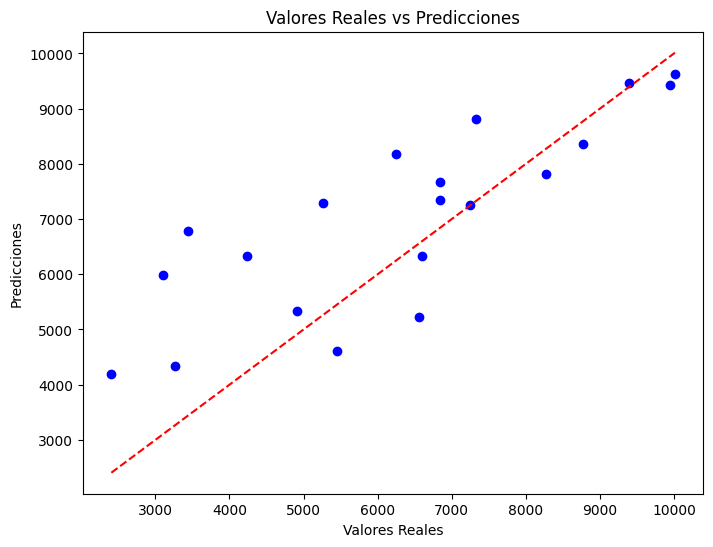

In [18]:
# Gráfico de comparación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()